# Creating Visualisations using Matplotlib, Seaborn and Folium

Creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [3]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import folium

In [4]:
# Import Data

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

In [5]:
# Display dataframe

df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
# Display statistical summary

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
# Display columns' names

df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

#### Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

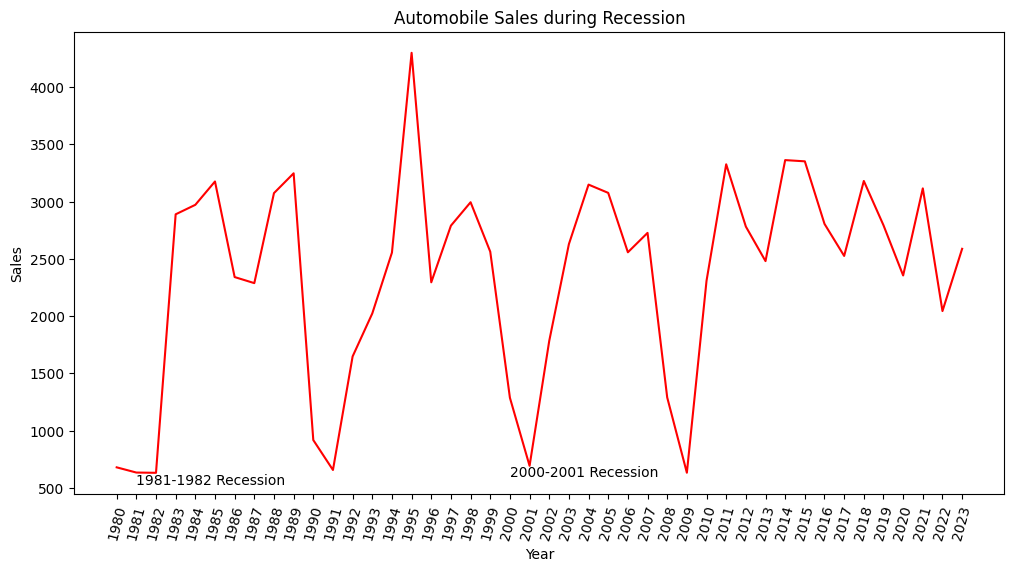

In [8]:
# Create years list to use it xsticks
years = list(range(1980,2024))

# Calculate the mean of automobile sales for each year using groupby
df_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Plot the average automobile sales over the years as a line plot
df_sales.plot(kind= 'line', color= 'red')

# Set title and labels
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')

# Set custom tick marks on the x-axis, rotated for better readability
plt.xticks(years, rotation = 75)

# Add text annotations for recession periods
plt.text(1981, 525, '1981-1982 Recession')
plt.text(2000, 600, '2000-2001 Recession')

# Display the plot
plt.show()

#### Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

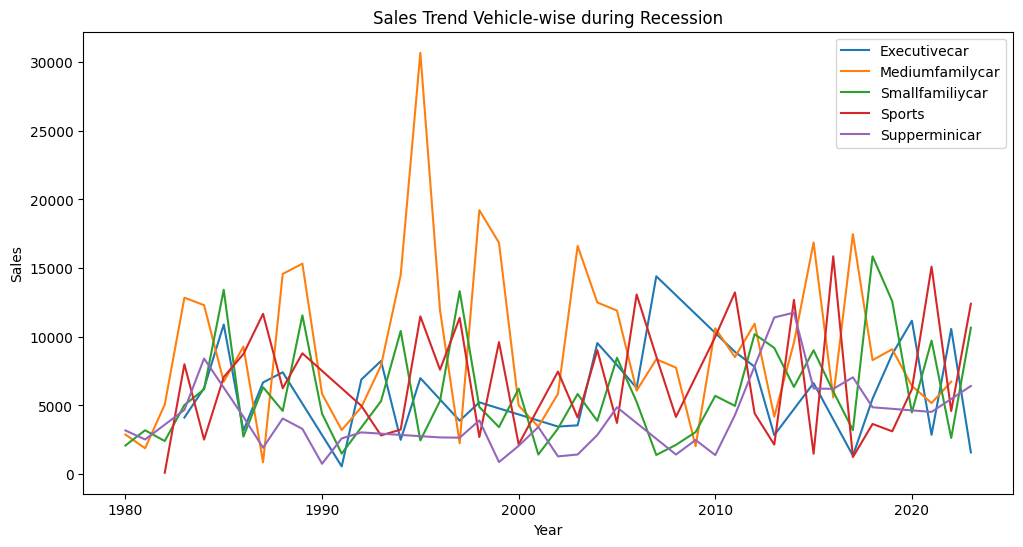

In [9]:
# Group the DataFrame by year and vehicle type, calculating the sum of automobile sales for each group
df_vehicle = df.groupby(['Year', 'Vehicle_Type'], as_index= False)['Automobile_Sales'].sum()

# Set the 'Year' column as the index of the DataFrame
df_vehicle.set_index('Year', inplace= True)

# Group the DataFrame again by 'Vehicle_Type' to plot separate lines for each vehicle type
df_vehicle2= df_vehicle.groupby(['Vehicle_Type'])['Automobile_Sales']

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Plot the sales trend for each vehicle type over the years as line plots
df_vehicle2.plot(kind= 'line')

# Set title and labels
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display legend to differentiate between different vehicle types
plt.legend()

# Display the plot
plt.show()

<b> Inference: </b>

<p>From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle, while sales of the superminicar and smallfamilycar increased.</p>

#### Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

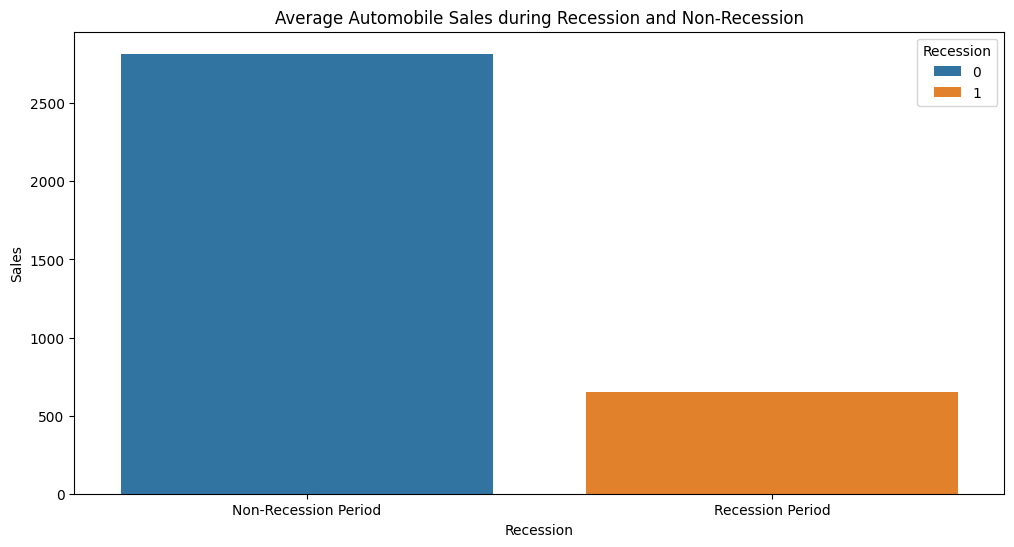

In [10]:
# Group the DataFrame by 'Recession' and calculate the mean of automobile sales for each group
sales_trend = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Create a bar plot using seaborn, with 'Recession' as x-axis, 'Automobile_Sales' as y-axis, and colored by 'Recession'
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=sales_trend)

# Set title and labels
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xlabel('Recession')
plt.ylabel('Sales')

# Set custom labels for the x-axis ticks
plt.xticks(ticks=[0,1], labels=['Non-Recession Period', 'Recession Period'])

# Display the plot
plt.show()

#### Compare the sales of different vehicle types during a recession and a non-recession period

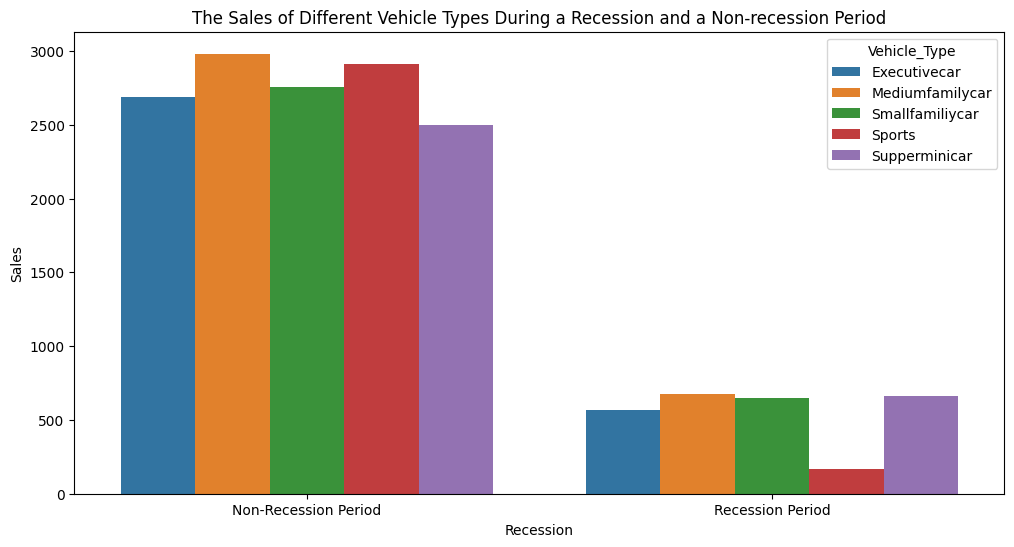

In [11]:
# Group the DataFrame by 'Recession' and 'Vehicle_Type', calculating the mean of automobile sales for each group
type_trend = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Create a bar plot using seaborn, with 'Recession' as x-axis, 'Automobile_Sales' as y-axis, colored by 'Vehicle_Type'
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=type_trend)

# Set title and labels
plt.title('The Sales of Different Vehicle Types During a Recession and a Non-recession Period')
plt.xlabel('Recession')
plt.ylabel('Sales')

# Set custom labels for the x-axis ticks
plt.xticks(ticks=[0,1], labels=['Non-Recession Period', 'Recession Period'])

# Display the plot
plt.show()

<b> Inference: </b>

<p> The impact of the recession is notably pronounced on sales of sports car types, while other types of sales are also affected, albeit to a lesser extent compared to sports car types.</p>

#### Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

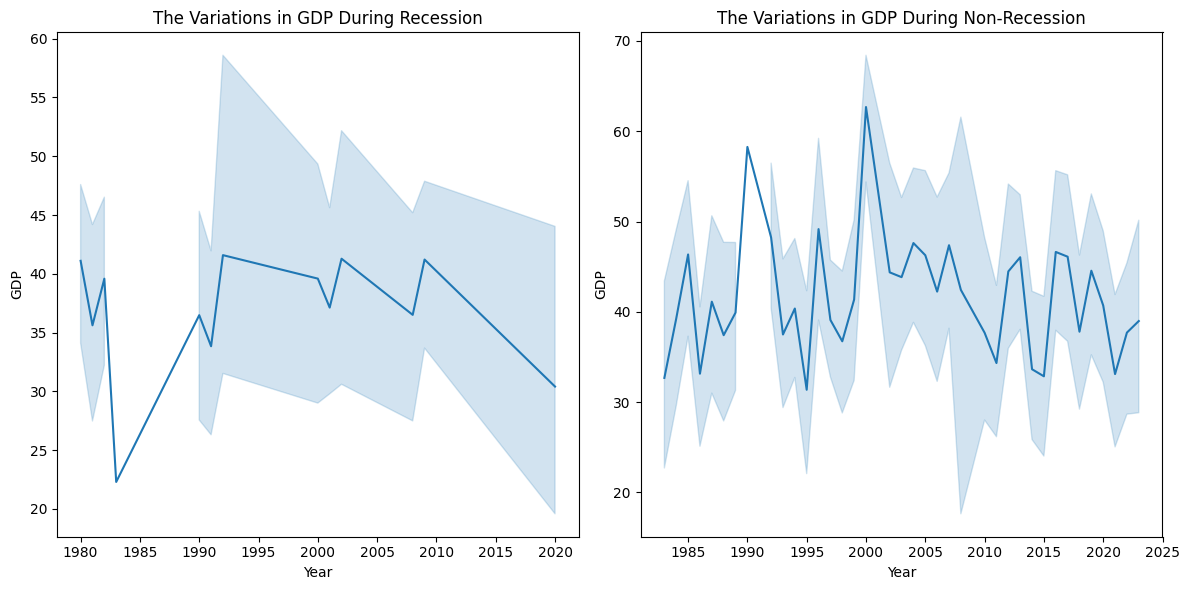

In [12]:
# Separate the DataFrame into two based on recession status
df_rec = df[df['Recession'] == 1]
df_non = df[df['Recession'] == 0]

# Create a new figure with two subplots side by side
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# First Plot: GDP variations during recession
sns.lineplot(x='Year', y='GDP', data=df_rec, ax=ax0)
ax0.set_title('The Variations in GDP During Recession')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Second Plot: GDP variations during non-recession
sns.lineplot(x='Year', y='GDP', data=df_non, ax=ax1)
ax1.set_title('The Variations in GDP During Non-Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display the plots
plt.show()

<b> Inference: </b>

<p>From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company
</p>

#### Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

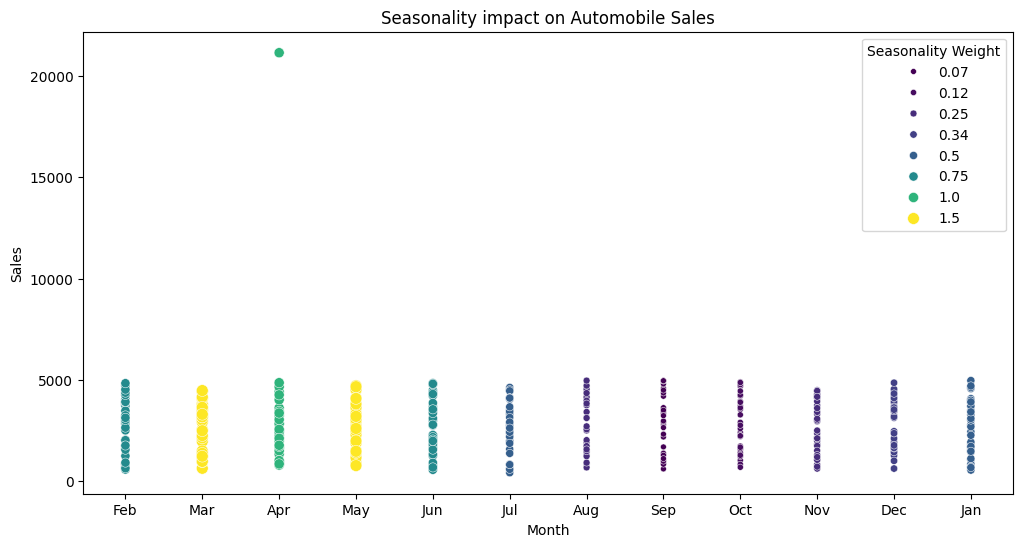

In [22]:
# Filter the DataFrame for non-recession periods
df_non_rec = df[df['Recession'] == 0]

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Create a scatter plot showing the relationship between month and automobile sales, with size indicating seasonality weight
sns.scatterplot(data=df_non_rec, x='Month', y='Automobile_Sales', size='Seasonality_Weight', hue='Seasonality_Weight', palette='viridis', legend='full')

# Set title and labels
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.legend(title='Seasonality Weight')
# Display the plot
plt.show()

<b> Inference: </b>

<p>From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.</p>



#### Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

##### Develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period

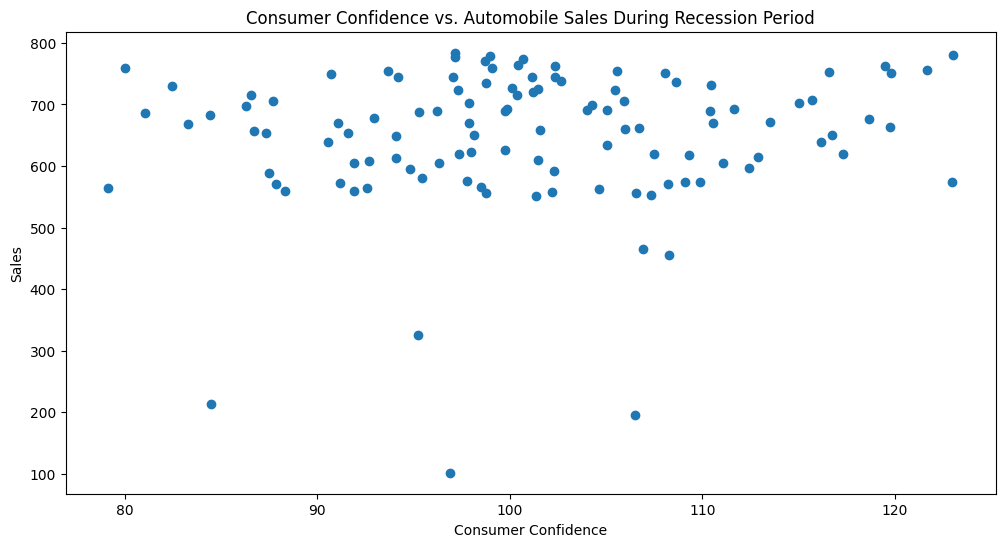

In [23]:
# Filter the DataFrame for recession periods
df_reg= df[df['Recession'] == 1]

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Create a scatter plot to visualize the relationship between consumer confidence and automobile sales during the recession period
plt.scatter(x=df_reg['Consumer_Confidence'], y=df_reg['Automobile_Sales'])

# Set title and labels
plt.title('Consumer Confidence vs. Automobile Sales During Recession Period')
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales')

# Display the plot
plt.show()

##### How does the average vehicle price relate to the sales volume during recessions?

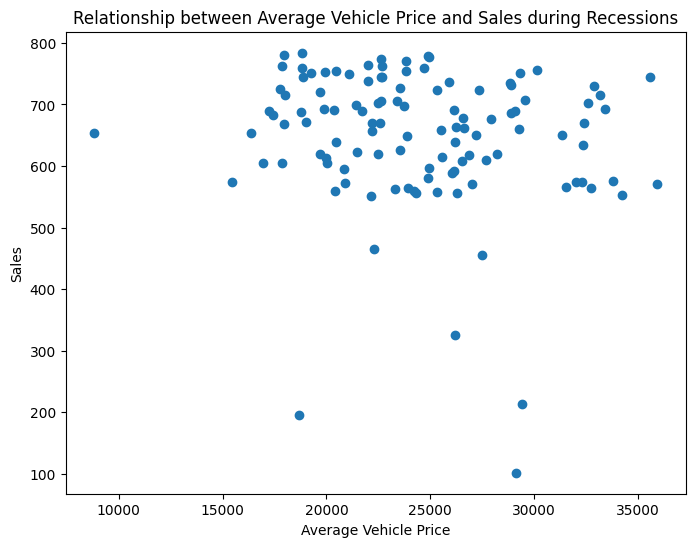

In [24]:
# Filter the DataFrame for recession periods
df_reg= df[df['Recession'] == 1]

# Create a new figure for the plot with size 8,6
plt.figure(figsize=(8,6))

# Create a scatter plot to visualize the relationship between average vehicle price and automobile sales during recessions
plt.scatter(df_reg['Price'],df_reg['Automobile_Sales'])

# Set title and labels
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales')

# Display the plot
plt.show()

<b> Inference: </b>

<p>There is no correlation.</p>


#### Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

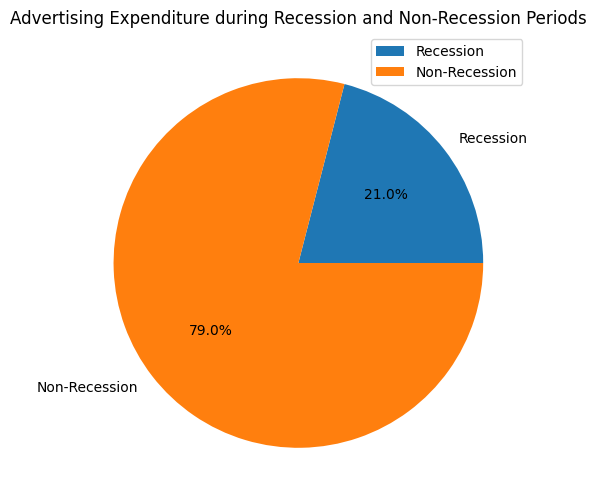

In [25]:
# Separate the DataFrame into recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Calculate the total advertising expenditure during recession and non-recession periods
rec_total= rec_data['Advertising_Expenditure'].sum()
non_rec_total= non_rec_data['Advertising_Expenditure'].sum()

# Create a new figure for the pie chart with size 12,6
plt.figure(figsize=(12,6))

# Create a pie chart to show the distribution of advertising expenditure during recession and non-recession periods
plt.pie([rec_total, non_rec_total], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%')

# Set the title
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Display the legend
plt.legend()

# Display the plot
plt.show()

<b> Inference: </b>

<p>We can understand that during non-recession period advertisement expenditure is notably higher than recession period</p>

#### Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

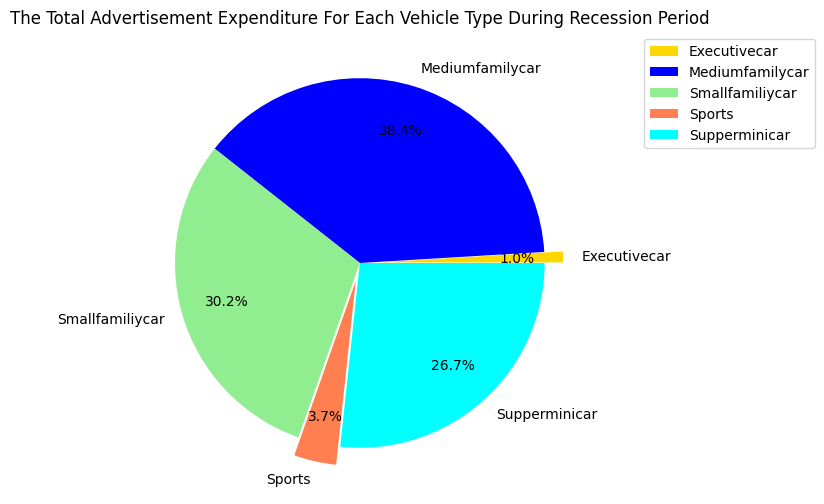

In [28]:
# Filter the DataFrame for recession periods
data_rec = df[df['Recession'] == 1]

# Define the explode list for the pie chart
explode_list = [0.1, 0, 0, 0.1,0 ]

# Calculate the total advertising expenditure for each vehicle type during recession
data_rec_total = data_rec.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a new figure for the pie chart with size 12,6
plt.figure(figsize=(12,6))

# Create a pie chart to show the total advertisement expenditure for each vehicle type during recession
plt.pie(data_rec_total, labels=data_rec_total.index, autopct='%1.1f%%', 
        colors = ['gold','blue','lightgreen','coral','cyan','red'], pctdistance=0.75, explode= explode_list)

# Set the title
plt.title('The Total Advertisement Expenditure For Each Vehicle Type During Recession Period')

# Display the legend outside the pie chart
plt.legend(data_rec_total.index,bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()

<b> Inference: </b>

<p>During recession the advertisements were mostly focued on low price range vehicle.</p>

#### Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

In [ ]:
data_rec = df[df['Recession'] == 1]

plt.figure(figsize=(12,6))
sns.lineplot(data_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', err_style=None)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Sales')
plt.show()